In [1]:
pip install pandas numpy matplotlib scipy seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import levene, shapiro, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from pathlib import Path
import shutil
import seaborn as sns
from os import walk, path, remove, listdir, makedirs
from pathlib import Path

In [4]:
masterPath = f"{str(Path.home())}/Documents/Rehab-notebook"
csvPath = f"{masterPath}/CSV"
metaPath = f"{masterPath}/Meta"
plotsPath=f"{masterPath}/Plots"
print(csvPath)
if not path.exists(plotsPath):
    makedirs(plotsPath)
    
paths = []
names = []
data = []
guids = []
metas = []
analysis_types = []
processAll = False

csvDirs = listdir(csvPath)
plotsDirs = listdir(plotsPath)
directoriesToProcess = csvDirs if processAll else [directory for directory in csvDirs if directory not in plotsDirs]
for directory in directoriesToProcess:
    split = directory.split(".")
    guid = split[0]
    variant = split[1]
    print(guid,variant)
    for (dirpath, dirnames, filenames) in walk(f"{csvPath}/{directory}"):
        for filename in filenames:
            if filename[-4:] != ".csv": continue
            if path.exists(f"{plotsPath}/{directory}") and processAll==False: continue
            filePath=f"{dirpath}/{filename}"
            metaPath = filePath.replace("CSV","Meta").replace(".csv",".txt");
            data.append(pd.read_csv(filePath,sep=","))
            paths.append(filePath)
            names.append(filename)
            guids.append(guid)
            metas.append(open(metaPath).read().replace("\n", ""))
            analysis_types.append(variant)

print(f"paths len: {len(paths)}")
print(f"names len: {len(names)}")
print(f"types len: {len(analysis_types)}")

/home/igor/Documents/Rehab-notebook/CSV
-2113416533 normal
paths len: 60
names len: 60
types len: 60


In [5]:
for i in range(len(data)):
    df = data[i]
    #print(data[i]['Run'])
    df = df[df['Penalty']==0]
    df = df[df['Value']!=0]
    df = data[i].groupby(['Run','Iter']).agg('mean').reset_index()
    print(df)
    print(df.nunique())
    print("====================")

dtype: int64
         Run  Iter  Value  Penalty         Temp  InitialTemp
0       1701     1  10584        0  1000.000000         1000
1       1701     2  10542        0   995.000000         1000
2       1701     3  10499        0   990.025000         1000
3       1701     4  10312        0   985.074875         1000
4       1701     5  10269        0   980.149501         1000
...      ...   ...    ...      ...          ...          ...
413495  1800  4131   6826        0     0.000001         1000
413496  1800  4132   6825        0     0.000001         1000
413497  1800  4133   6825        0     0.000001         1000
413498  1800  4134   6825        0     0.000001         1000
413499  1800  4135   6782        0     0.000001         1000

[413500 rows x 6 columns]
Run             100
Iter           4135
Value          4262
Penalty           1
Temp           4135
InitialTemp       1
dtype: int64
        Run  Iter  Value  Penalty         Temp  InitialTemp
0       401     1  10541        0  

In [6]:
import numpy as np

for i in range(len(names)):
    
    fileName = names[i]
    variant = analysis_types[i]
    df = data[i]

    df = df.groupby(['Run','Iter']).agg('mean').reset_index()
    df = df[df['Penalty']==0]
    df = df[df['Value']!=0]
    df = df.iloc[::100] # every nth row
    minValue = min(df['Value'])
    maxValue = max(df['Value'])

    save_location = "/".join(paths[i].replace("CSV","Plots").split("/")[:-1]);
    Path(save_location).mkdir(parents=True, exist_ok=True)
    column = ""
    with PdfPages(f"{save_location}/{fileName}.pdf") as pdf:
        plt.figure(figsize=(20,15))    
        plt.figtext(.8,.8,f"Max value = {maxValue}\n\nMin value = {minValue}")
        plt.title(metas[i])
        if variant == "best":
            column = "Run"
        else:
            column = "Iter"
        sns.scatterplot(data=df,x=column,y="Value")
        pdf.savefig()
        plt.clf()
        plt.close()
        

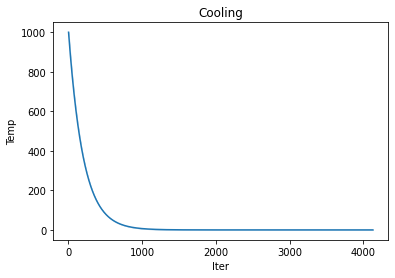

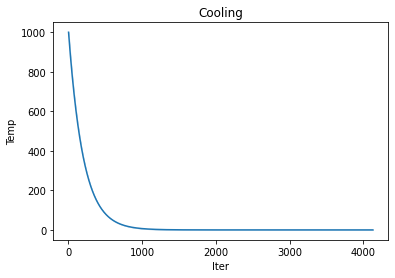

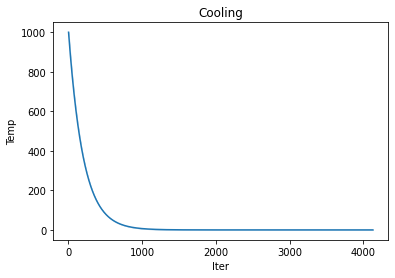

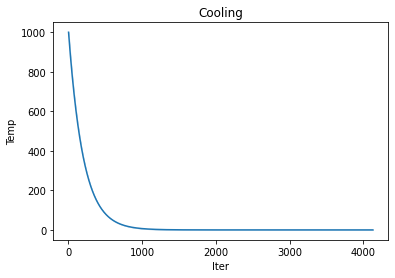

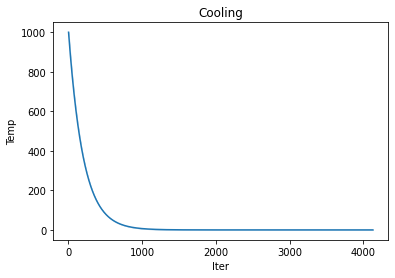

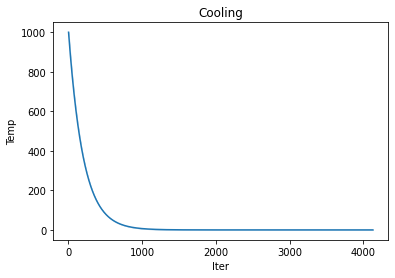

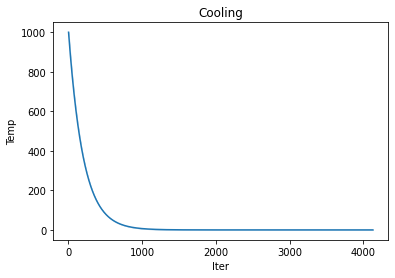

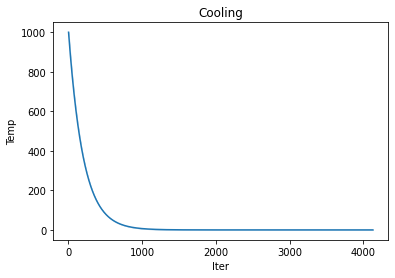

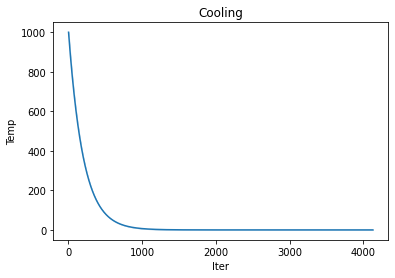

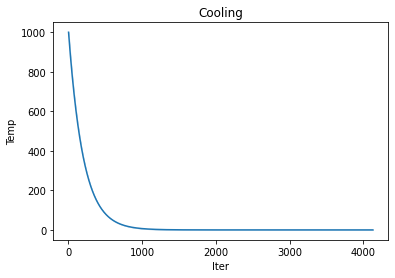

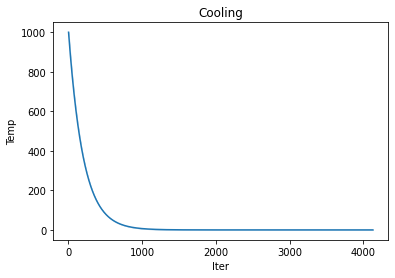

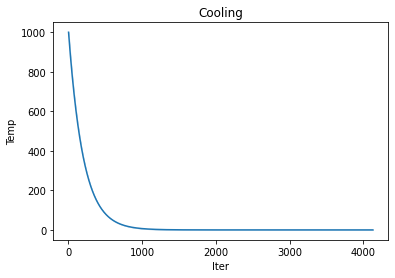

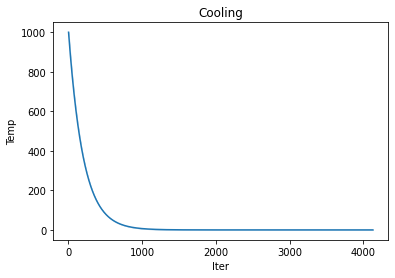

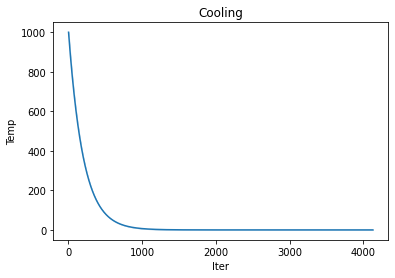

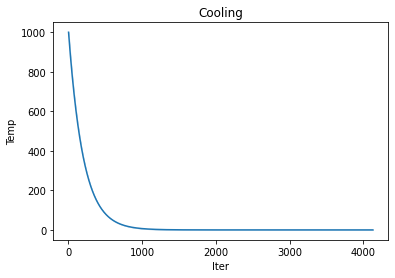

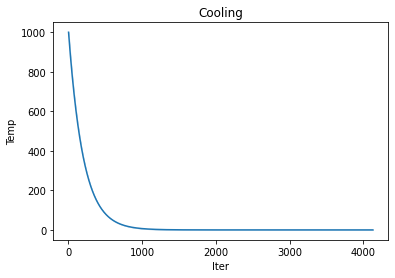

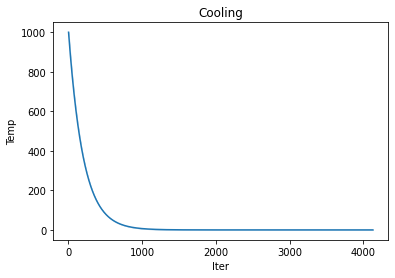

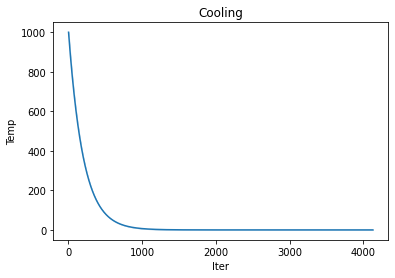

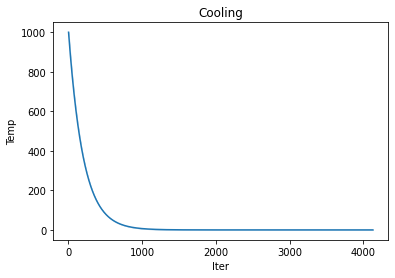

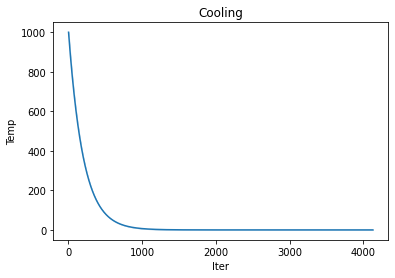

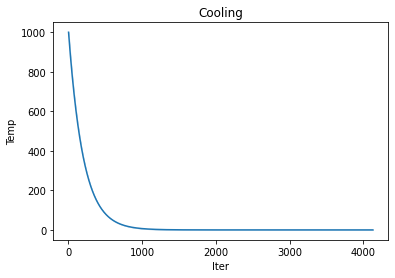

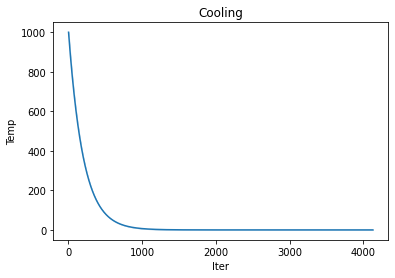

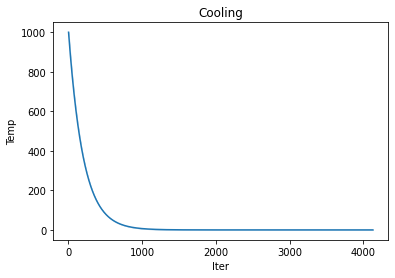

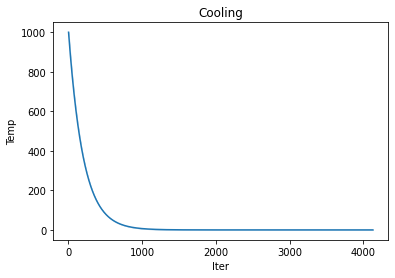

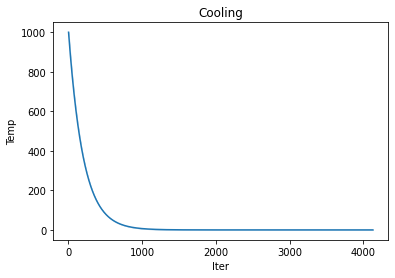

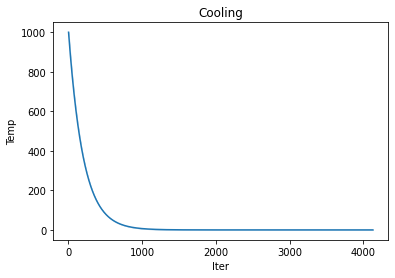

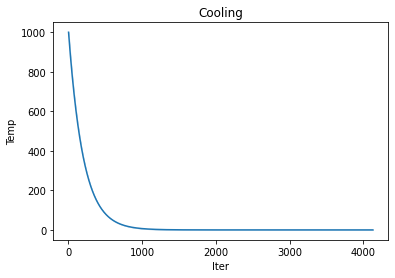

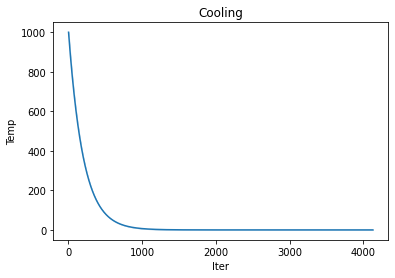

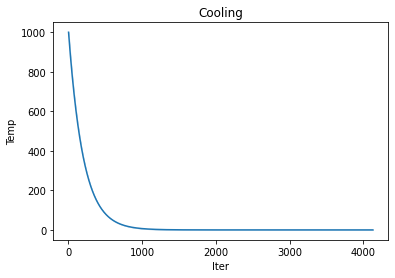

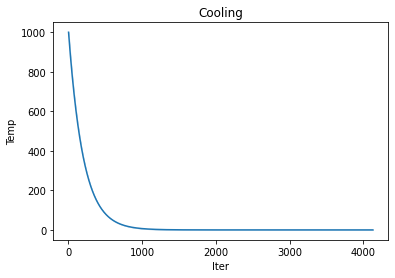

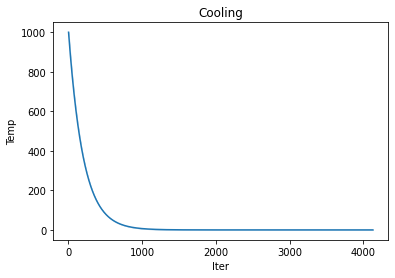

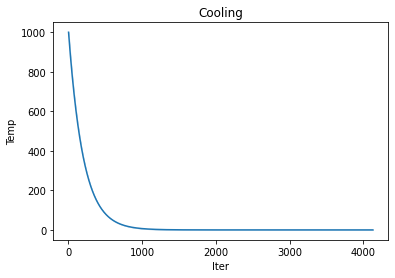

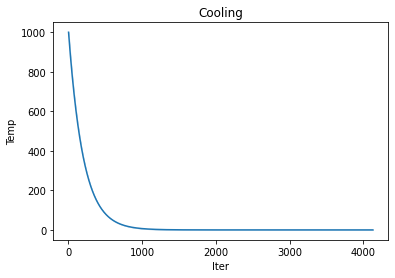

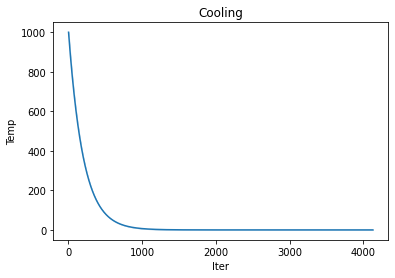

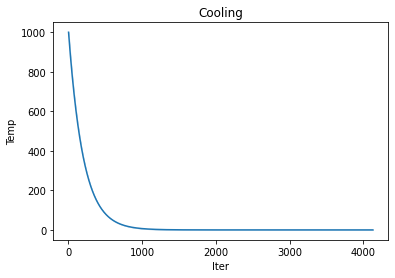

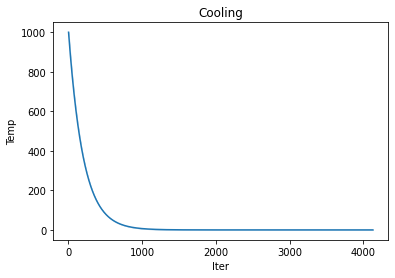

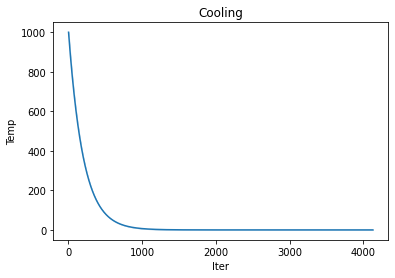

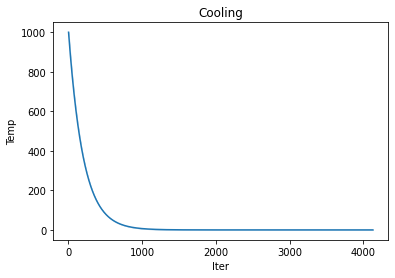

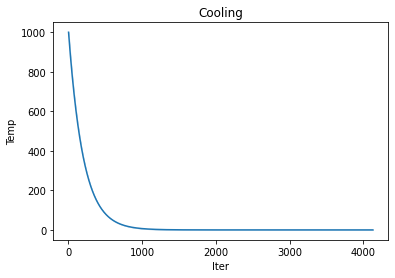

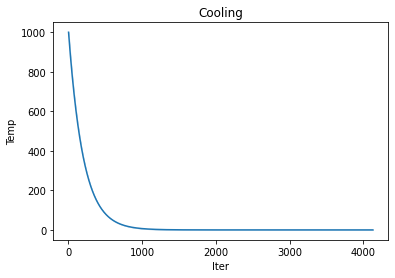

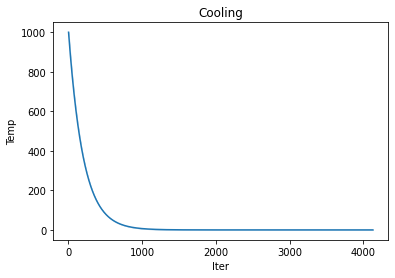

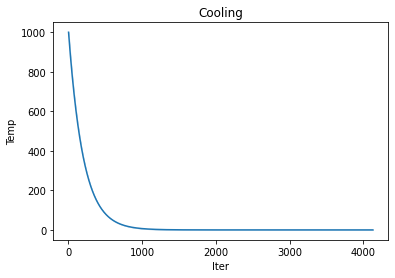

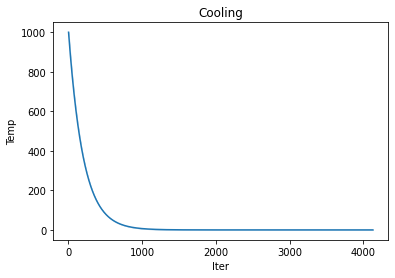

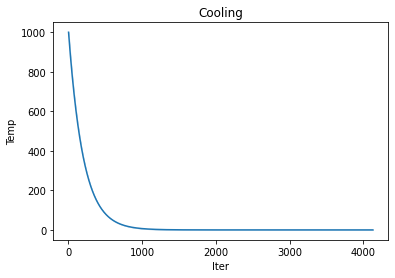

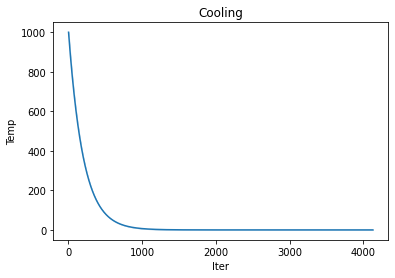

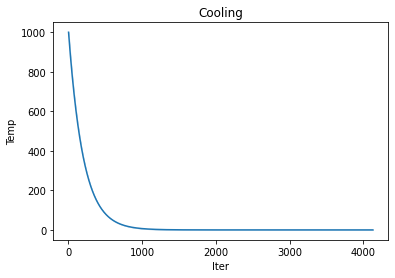

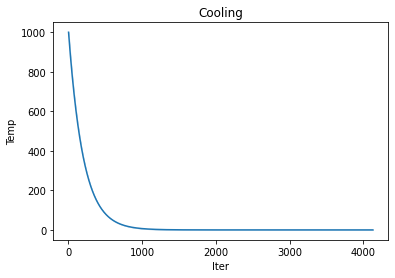

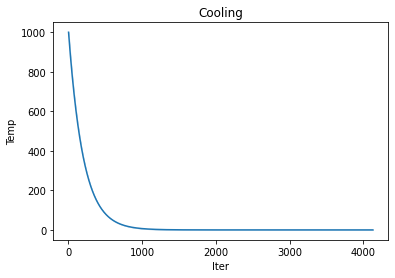

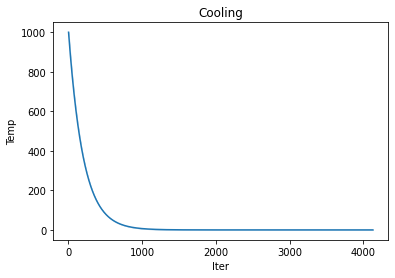

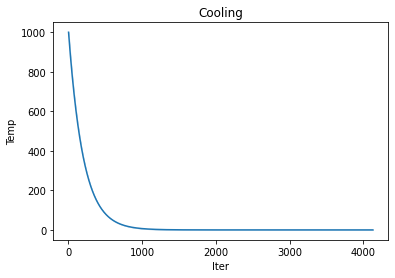

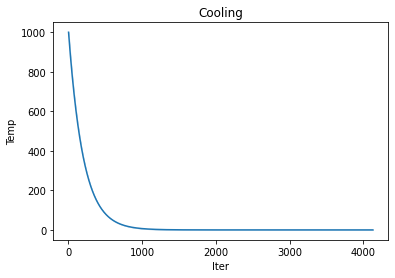

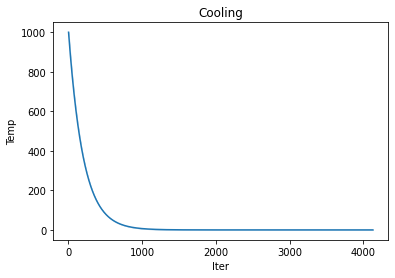

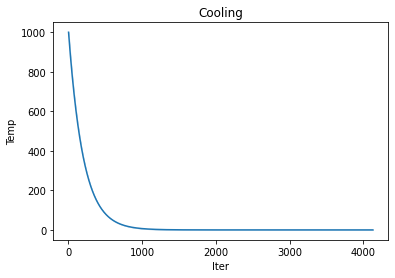

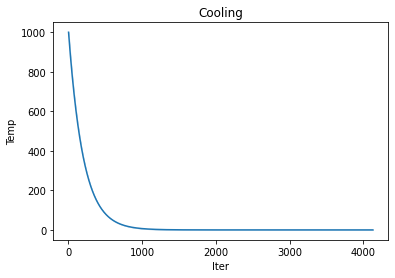

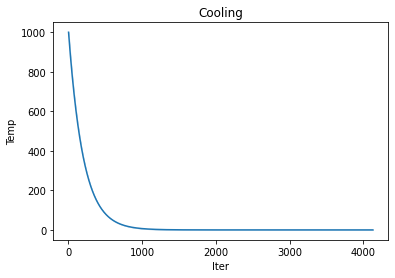

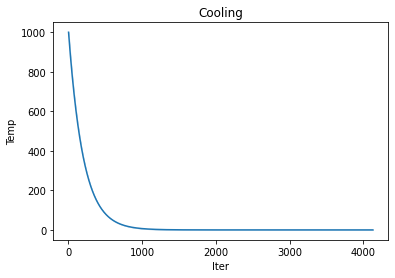

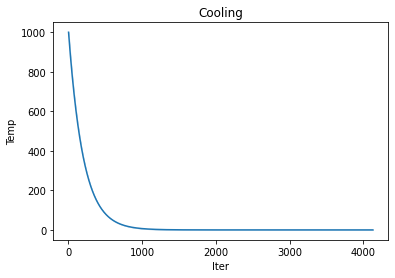

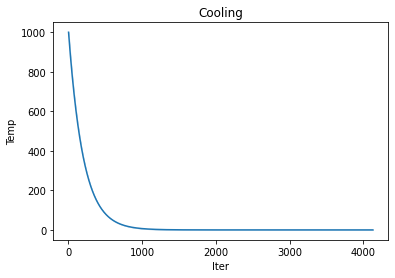

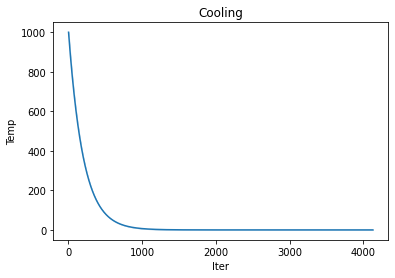

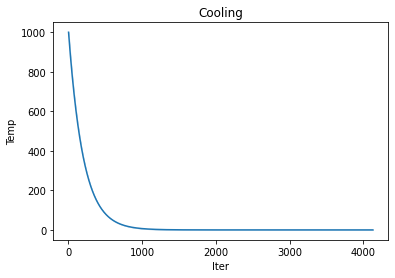

In [7]:
for i in range(len(data)):
    fileName = names[i]
    variant = analysis_types[i]
    df = data[i].iloc[::10] # every nth row
    if variant == "best":
        column = "Run"
    else:
        column = "Iter"

    plt.title("Cooling")
    sns.lineplot(data=df, x=column, y="Temp")
    plt.show()
    